<a href="https://colab.research.google.com/github/DharmeshRV/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


**Seoul Bike has become the capital city's popular public transport system. The public bicycle rental system is favored by Seoulites who wish to travel short distances of a few kilometers instead of using crowded buses or subway trains.**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **GitHub Link -**

https://github.com/DharmeshRV/Bike-Sharing-Demand-Prediction

# ***Let's Begin !***

## ***1. Knowing the Data***

### Import Libraries

In [1]:
# First we import the important  libraries 
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Now mount the drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the path of the data file
path='/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Bike Sharing Demand Prediction - Dharmesh Kumar/SeoulBikeData.csv'

In [4]:
# Now we create the dataframe 
bike_df=pd.read_csv(path,encoding = 'cp1252')

### Dataset First View

In [5]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Dataset Rows and Columns Count
bike_df.shape

(8760, 14)

### Dataset Information

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Duplicate Values

In [8]:
# looking for duplicate entries. True shows duplicate row.
bike_df.duplicated().value_counts()

False    8760
dtype: int64

### Null Values

In [9]:
# getting column-wise null values
bike_df.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did we know about our dataset

The dataset has information of rented bikes on hourly basis for one year. We have to analyze the rented bike count per hour and various factors affecting the rentals. The dataset has 8760 rows & 14 columns with no duplicate and null values.

## ***2. Understanding The Variables***

In [10]:
# columns in the dataframe
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# showing some statistical measures 
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Checking unique values in each column

In [12]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


In [13]:
# Unique values in 'Seasons','Holiday', 'Functioning Day' columns
j=['Seasons','Holiday', 'Functioning Day']
for i in j:
  print("Unique values in ",i,"are",bike_df[i].unique(),".")

Unique values in  Seasons are ['Winter' 'Spring' 'Summer' 'Autumn'] .
Unique values in  Holiday are ['No Holiday' 'Holiday'] .
Unique values in  Functioning Day are ['Yes' 'No'] .


### <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : day-month-year
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No Holiday
* ### Functional Day - No(Non Functional Hours), Yes(Functional hours)

## 3. ***Data Wrangling***

First of all we rename the columns to understandable names that are easy to use.

In [14]:
# Code to rename the columns
bike_df.rename(columns = {'Date':'date','Rented Bike Count':'rented_count', 'Hour':'hour','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                          'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temp',
                          'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'seasons',
                          'Holiday':'holiday','Functioning Day':'funct_day'},inplace=True)

We have 'date' column with object data type so first we change it to datetime datatype. Further we create a column for days using the 'date' column because days of the week may exhibit some kind of renting pattern.



The dataset has a 'season' column with 4 seasons of the year so we are not considering to analyze the month-wise renting.

In [15]:
# Changing the datatype of date column
bike_df['date']=pd.to_datetime(bike_df['date'], format = "%d/%m/%Y")
# Creating a column for days
bike_df['days'] = bike_df['date'].dt.day_name()

In [16]:
# count of average rentals for each hour
bike_df.groupby('hour')['rented_count'].mean()

hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: rented_count, dtype: float64

The 'hour' column in the dataset has 24 values from 0 to 23 hours so we considerd grouping them in some periods for better analysis and decided to divide the 24 hours in 3 periods of 8 hours each. The 3 periods are defined as:
* 'night' : starts from mid-night at 0 hours and lasts till 7 hours in the morning.
* 'day' : starts in the morning at 8 hours and lasts till 15 hours in the after-noon.
* 'evening' : starts in the after-noon at 16 hours and lasts till 23 hours in the night.


In [17]:
# Forming the 'period' column with periods defined above.
bike_df['period']= bike_df['hour'].apply(lambda x: 'night' if x<8 else ( 'day' if x<16 else'evening'))

In [18]:
# Make a copy of dataframe
df=bike_df.copy()

In [19]:
# Now we drop the date column
df.drop(columns=['date'], inplace=True)

In [20]:
df.head()

,rented_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,funct_day,days,period
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night


### What all manipulations are done and insights we found?

All the manipulations are done to get a workable and analysis-friendly dataset. First we renamed the columns to sensible names.

The 'date' column in the dataset we are provided with was of object type so to make it usable we changed it to 'datetime' format. The analysis of day-wise renting would make more sense so we got a column for days from date column. We'll see various relationships in the next section.


In order to get some insight from various day-segments we divide the 24 hours of day in 3 parts of 8 hours. It will make us aware of some renting pattern in the next section.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distribution Chart on Dependant Variable i.e., Rented Bike Count  (Univariate)

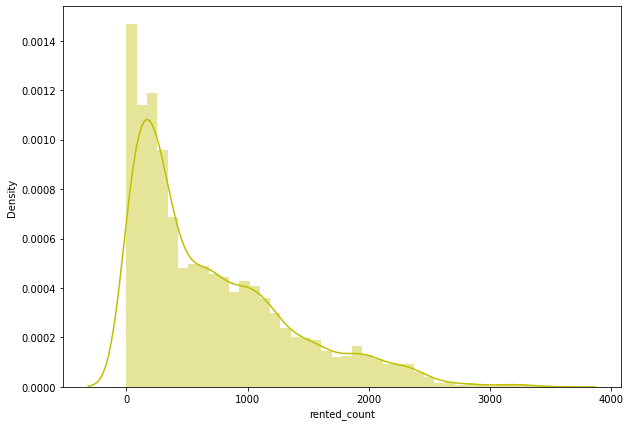

In [21]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(10,7))
sns.distplot(df['rented_count'],color="y")

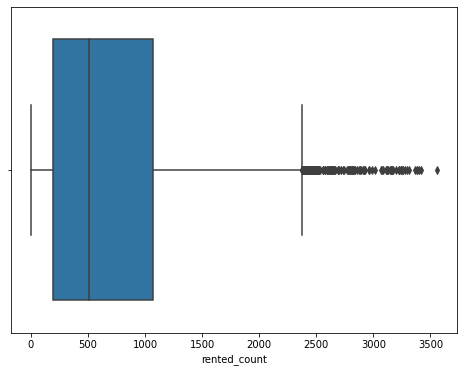

In [22]:
# Boxplot for rented_count column to show outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['rented_count'])


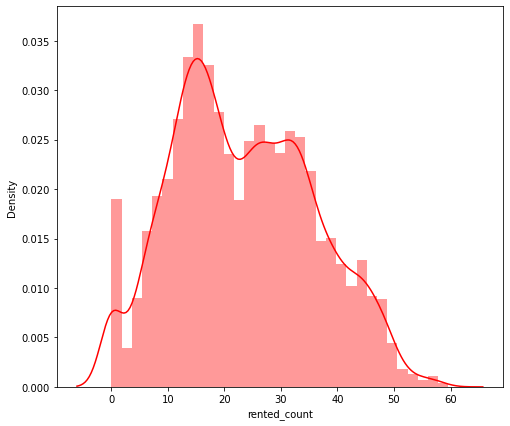

In [23]:
# the Rented Bike Count data is skewed towards the right so we apply the squre root transformation
plt.figure(figsize=(8,7))
sns.distplot(np.sqrt(df['rented_count']),color='r')

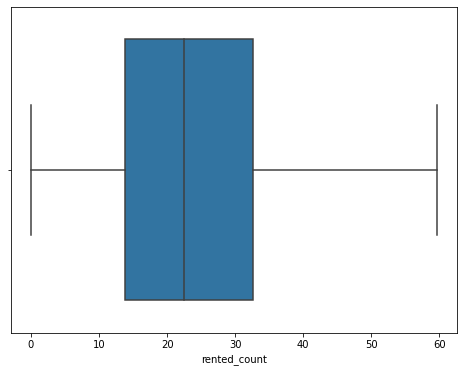

In [24]:
# Boxplot for rented_count column to show outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=np.sqrt(df['rented_count']))


##### 1. Why did we pick the specific chart?

The distribution chart expresses the pattern according to which the values are distributed. We generally use a histogram  or distribution plot to understand the pattern. 

 Anothor way to graphically demonstrate the locality, spread and skewness of numerical data is the box plot.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most of the values are concentrated in the left. The rented count values that are more than 1000 or so have less frequency and the distribution is positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 

The distribution of rental bike count on hourly basis gives the idia of the most likely and the most unlikely rental count so that the management can arrange the bikes accordingly.

#### Chart - 2 - distributon of Numeric features (Univariate)

In [25]:
# first we get the numeric features listed
numeric_features=df.describe().columns
numeric_features

Index(['rented_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall'],
      dtype='object')

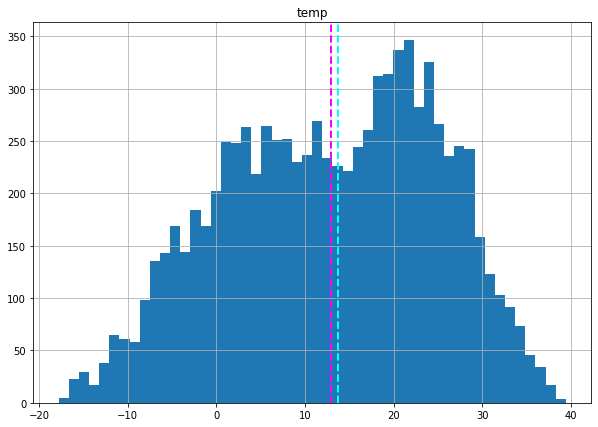

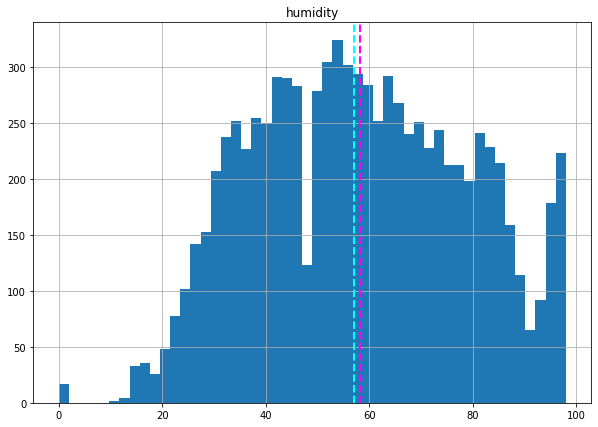

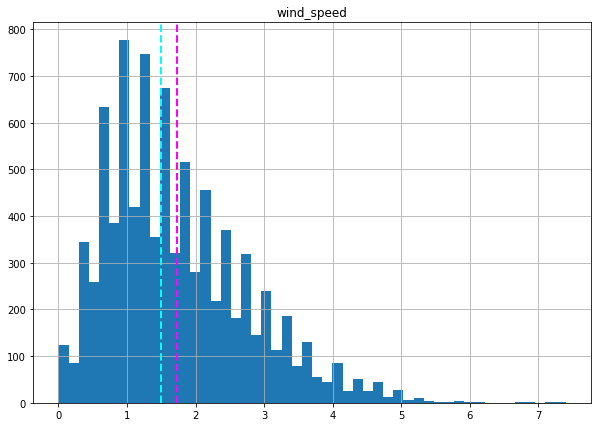

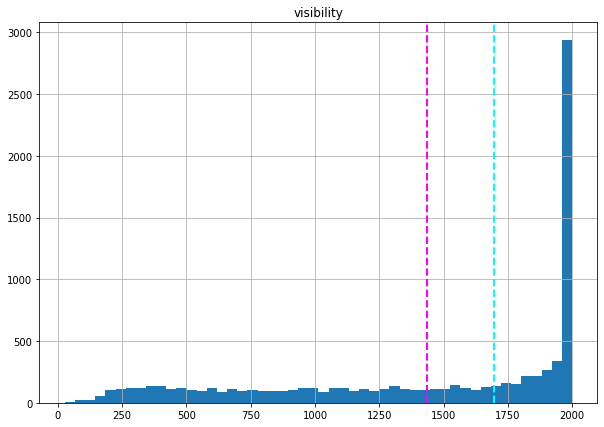

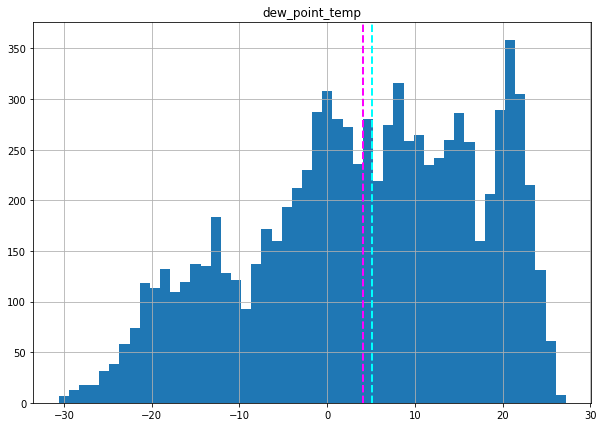

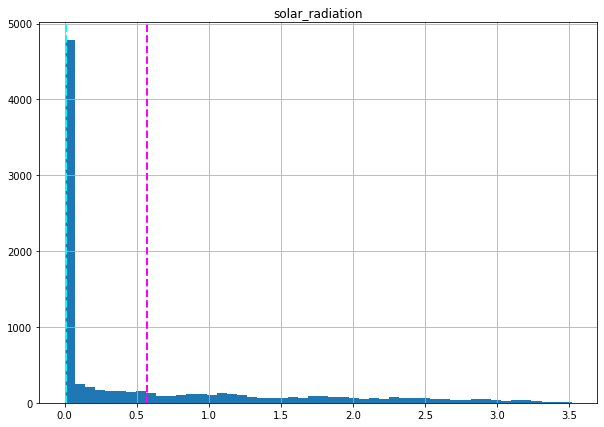

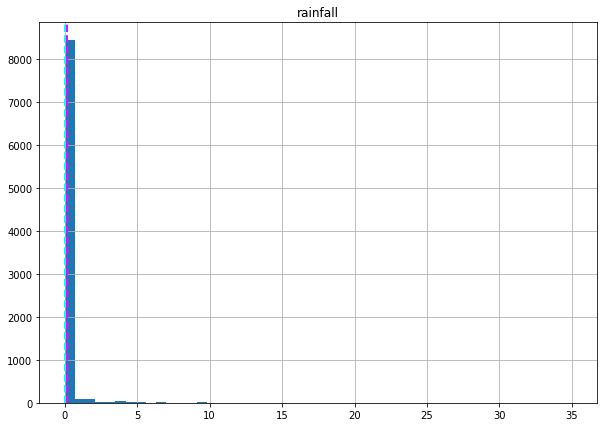

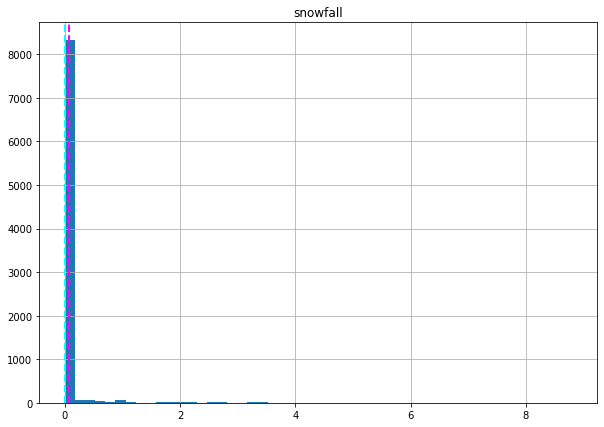

In [26]:
  # We plot hoistograms for eache numerical feature to see the distribution of the data.
for i in numeric_features[2:]:
    fig=plt.figure(figsize=(10,7))
    ax=fig.gca()
    feature= df[i]
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()


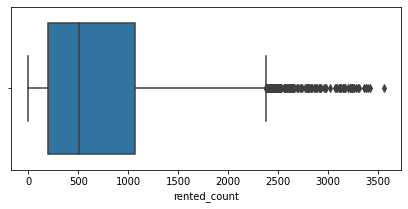

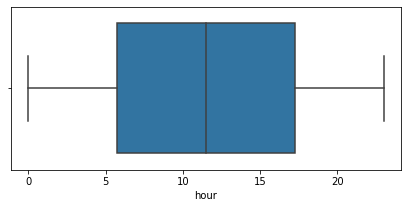

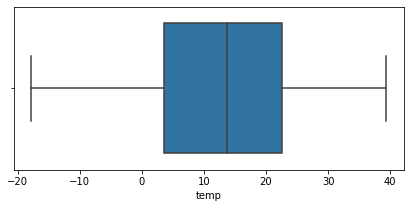

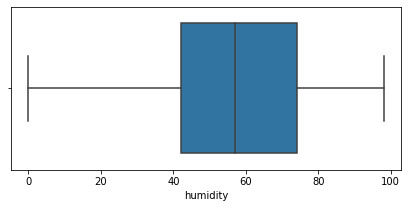

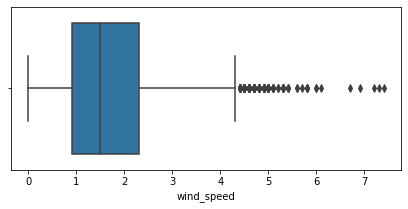

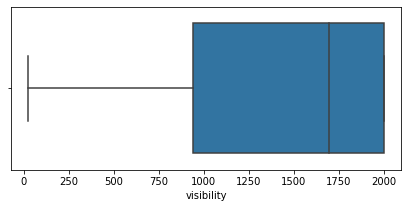

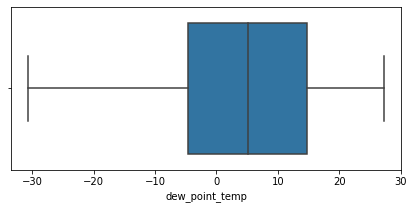

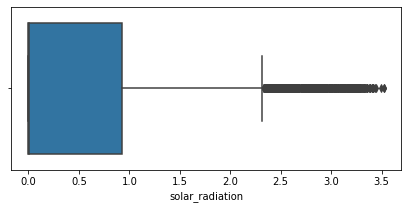

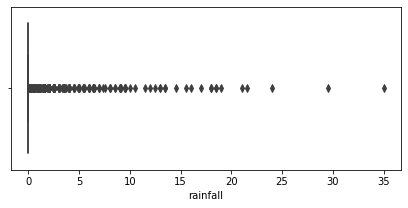

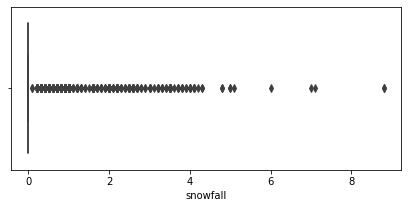

In [27]:
# box plot for each columns to know the data distibution
for col in numeric_features:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=df[col])
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps in understanding the distribution of data. We can also make a guess of mean values.
In order to get the distribution of numeric data we are using the histogram which clearly expresses the frequencies, indicates  mean values.

box plot is used to analyse the outliers and interquartile range including median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

The temperature data can be considered normally distributed with mean 12.88°C. All the values lie between -18°C to 40°C.

The distribution of humidity data is not very far from normality. Average humidity is 58.2 %. All the values are between 0 and 100.

The chart shows that the wind speed data is positively skewed with values greater than 4 m/s having very small frequencies. 1.72 m/s is the mean speed and 0.0 and 7.4 m/s are the min. & max. values respectively.

The visibility data is not normal. 1436.8 deca m is the mean value. More than 25% entries have value 2000 which is the ehighest value as well. Other smaller values are somewhat uniformally distributed.

Dew point temperature data is left-skewed and values range from -30.6 to 27.2 °C. The average value is 4.07°C.

The solar radiation data is highly skewed towards the right with mean at ~0.56 MJ/m2. Approximately 50% values are less than 0.01 MJ/m2 and the highest value is ~3.5 MJ/m2

Since this is hourly rainfall, the chart shows that approximately all the values are concentrated at 0.0 mm and the highest value is 35 mm with mean at ~0.15 mm.

The chart shows that most of the hourly snowfall values are 0.0 cm.

#### Chart - 3 - Bar plot for rental counts vs hours

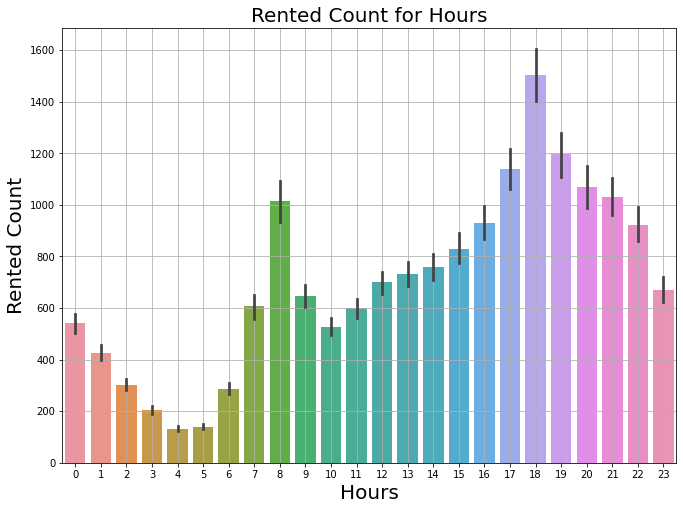

In [28]:
# bar chart for hourly average rentals.
plt.figure(figsize=(11,8))
sns.barplot(data=df,x='hour',y='rented_count')
plt.title('Rented Count for Hours',fontsize=20)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

##### 1. Why did you pick the specific chart?

Bar chart represents categorical data by rectangular bars as categories with hights proportional to the values they represent. It helps in detecting the trends over different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the renting decreases from 0 hours in the mid night upto 4 hours in the early morning which has the minimum average rentaing of bikes and then it increases till 8 hours in the morning. After decreasing between 8 to 10 hours, renting starts increasing and increases till 18 hours in the evening which has the highest average renting in the day. After 18 hours the renting decreases gradually.

#### Chart - 4  - Bar plot for Season_wise Rentals

In [29]:
# code to get average rentals in each season.
df.groupby('seasons')['rented_count'].mean()

seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: rented_count, dtype: float64

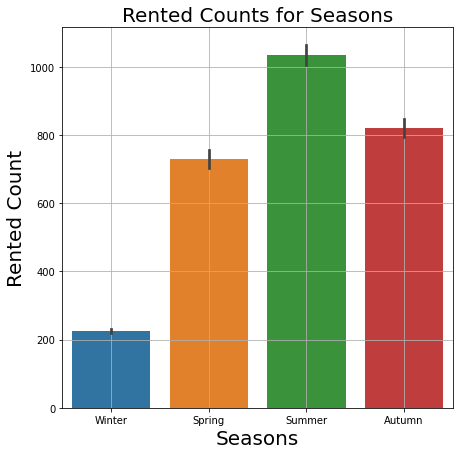

In [30]:
# Bar chart for season-wise rentals.
plt.figure(figsize=(7,7))
sns.barplot(data=df,x="seasons", y="rented_count")
plt.xlabel("Seasons",fontsize=20)
plt.title("Rented Counts for Seasons",fontsize=20)
plt.ylabel("Rented Count",fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

The bar chart shows average rented count in each season. Winter has the least rentals and summer has the most. In winter  there may be snowfall and people prefer a bus or a taxi to a bike so summer and autumn attract more rentals.

#### Chart - 5  - Bar plot for holiday vs rented count

In [31]:
# getting the number of holidays in the dataset.
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

There are 432 (hours) entries for holidays in the dataset.

In [32]:
# Counting aaverage rentals for holiday and no-holiday.
df.groupby('holiday')['rented_count'].mean()

holiday
Holiday       499.756944
No Holiday    715.228026
Name: rented_count, dtype: float64

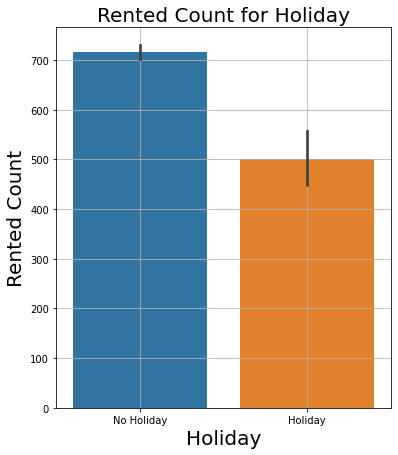

In [33]:
# Bar plot for average rentals against holiday.
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='holiday',y='rented_count')
plt.title('Rented Count for Holiday',fontsize=20)
plt.xlabel('Holiday',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart shows trends over different categories representing the values with the hights of bars. Here bike rentals are plotted for holiday and no-holiday.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the two categories do not have the same rental counts. Non-holiday recorded more rentals than a holiday, it may be because on a holiday most of the people don't have to go anywhere.

#### Chart - 6  - Bar plot for average rentals for Functioning Day.

In [34]:
# Counting the functioning and non-functioning hours.
df['funct_day'].value_counts()

Yes    8465
No      295
Name: funct_day, dtype: int64

There are 295 entries for non-functional hours.

In [35]:
# Average renting on functioning and non-functioning hours
df.groupby('funct_day')['rented_count'].mean()

funct_day
No       0.000000
Yes    729.156999
Name: rented_count, dtype: float64

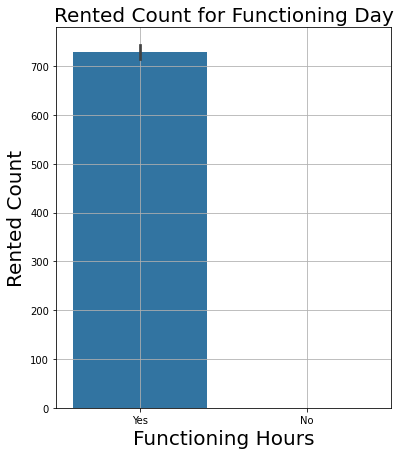

In [36]:
# Bar plot for mean rental vs functioning-day
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='funct_day',y='rented_count')
plt.title('Rented Count for Functioning Day',fontsize=20)
plt.xlabel('Functioning Hours',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

There is no renting of bike  in any non- funtional hour. So, for a non-functional day/hour renting is seemed to be closed.

#### Chart - 7 - Bar plot for rental counts vs period

In [37]:
# count of everage renting in different periods
df.groupby('period')['rented_count'].mean()

period
day         726.382192
evening    1057.692808
night       329.731164
Name: rented_count, dtype: float64

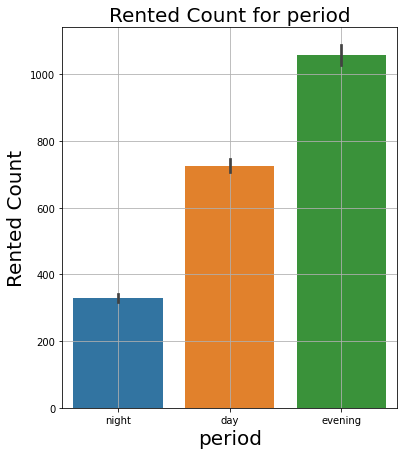

In [38]:
# bar chart for period-wise average rentals.
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='period',y='rented_count')
plt.title('Rented Count for period',fontsize=20)
plt.xlabel('period',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

In the night period the average renting count is the least and during the day there are moderate rentings. In the evenig everage renting is the highest.

#### Chart - 8 - Bar plot for day-wise rental counts

In [39]:
# count of everage renting on different days
df.groupby('days')['rented_count'].mean()

days
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: rented_count, dtype: float64

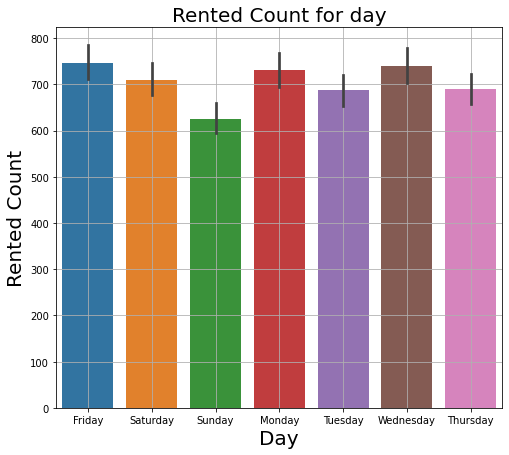

In [40]:
# bar chart for day-wise average rentals.
plt.figure(figsize=(8,7))
sns.barplot(data=df,x='days',y='rented_count')
plt.title('Rented Count for day',fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)


#####  What is/are the insight(s) found from the chart?

Sunday has the mimimum average renting with friday having the highest and there are no huge differeces among other days.

#### Chart - 9 - Scatter plot between Hour and rented count (Bivariate) 

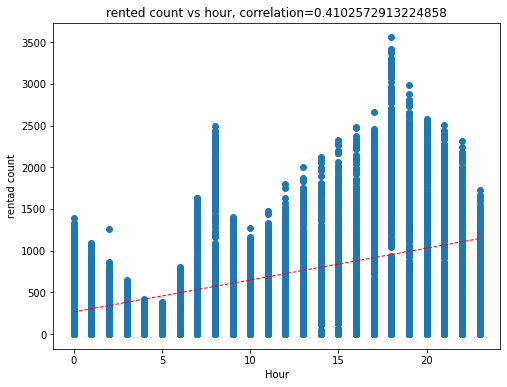

In [41]:
# scatter plot between hour and rented _count
fig= plt.figure(figsize=(8,6))
ax=fig.gca()
correlation=df['hour'].corr(df['rented_count'])
plt.scatter(x=df['hour'],y=df['rented_count'])
plt.xlabel('Hour')
plt.ylabel('rentad count')
ax.set_title('rented count vs hour, correlation='+str(correlation))
z=np.polyfit(df['hour'],df['rented_count'],1)
y_hat = np.poly1d(z)(df['hour'])
plt.plot(df['hour'], y_hat, "r--", lw=1)
plt.show()


##### 1. Why did you pick the specific chart?

 Scatter plot uses Cartesian coordinates to display values for two variables for a set of data. It shows the relationship between the dependent and independent variables plotted on the y and x axes respectively.

#####2. What is/are the insight(s) found from the chart?

The rented count shows increasing trend  with hours but the correlation is not that strong. The higher hour values have higher rented count but every hour have some small rented count so, roughly, higher hour value does not imply higher rented count.

#### Chart - 10 - temperature vs rented_count scatter plot

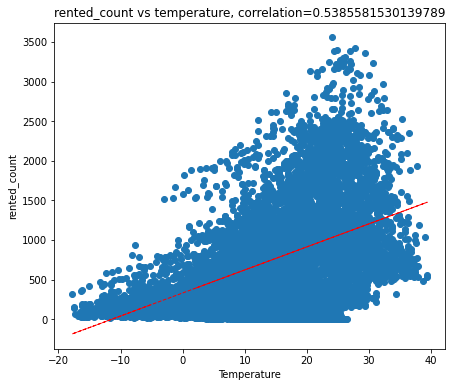

In [42]:
# Plotting temperature and rented_count on X-Y plane
fig = plt.figure(figsize=(7,6))
ax=fig.gca()
correlation = df['temp'].corr(df['rented_count'])
plt.scatter(x=df['temp'],y=df['rented_count'])
plt.xlabel('Temperature')
plt.ylabel('rented_count')
plt.title('rented_count vs temperature, correlation='+str(correlation))
z=np.polyfit(df['temp'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['temp'])
plt.plot(df['temp'],y_hat,'r--',lw=1)
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count is positively correlated with temperature though the correlation coefficient is not very high.

#### Chart - 11 - Scatter plot between Humidity and rented count (Bivariate) 

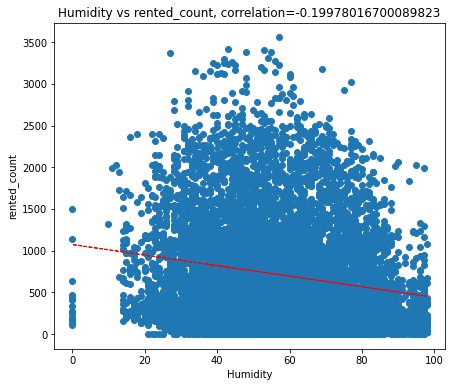

In [43]:
# Scatter plot between Humidity and rented count 
fig = plt.figure(figsize=(7,6))
ax=fig.gca()
correlation = df['humidity'].corr(df['rented_count'])
plt.scatter(x=df['humidity'],y=df['rented_count'])
z=np.polyfit(df['humidity'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['humidity'])
plt.plot(df['humidity'],y_hat,'r--',lw=1)
plt.xlabel('Humidity')
plt.ylabel('rented_count')
plt.title('Humidity vs rented_count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count is slightly negatively correlated with humidity.

#### Chart - 12 - Wind speed vs rented count scatter plot

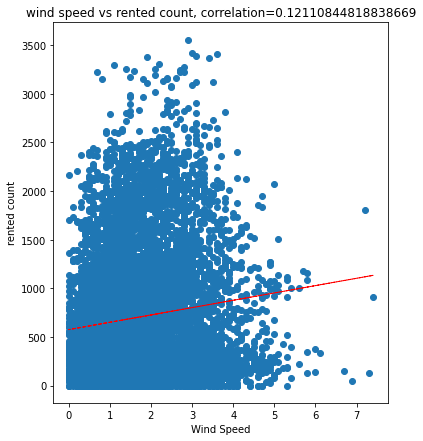

In [44]:
# Plotting scatter plot between wind speed and rented_count
fig = plt.figure(figsize=(6,7))
ax=fig.gca()
correlation = df['wind_speed'].corr(df['rented_count'])
plt.scatter(x=df['wind_speed'],y=df['rented_count'])
z=np.polyfit(df['wind_speed'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['wind_speed'])
plt.plot(df['wind_speed'],y_hat,'r--',lw=1)
plt.xlabel('Wind Speed')
plt.ylabel('rented count')
plt.title('wind speed vs rented count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count shows a slightly positive trend with wind speed.

#### Chart - 13 - Visibility vs rented count scatter plot

Text(0.5, 1.0, 'visibility vs rented_count, correlation=0.19928029673135897')

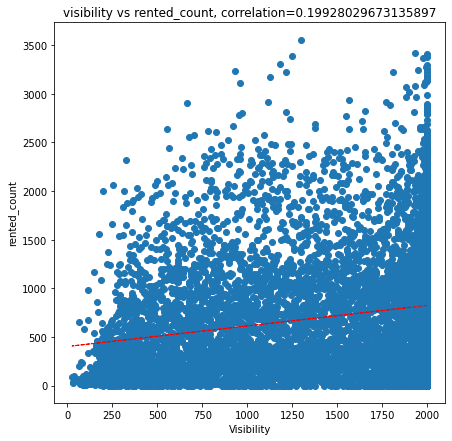

In [45]:
# plotting visibility and rented_count on 2D plane
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['visibility'].corr(df['rented_count'])
plt.scatter(x=df['visibility'],y=df['rented_count'])
z = np.polyfit(df['visibility'],df['rented_count'],1)
y_hat = np.poly1d(z)(df['visibility'])
plt.plot(df['visibility'],y_hat,'r--',lw=1)
plt.xlabel('Visibility')
plt.ylabel('rented_count')
plt.title('visibility vs rented_count, correlation='+str(correlation))


#####. What is/are the insight(s) found from the chart?

Though the correlation of rented_count with visibility is positive, it does not matter much.

#### Chart - 14 - Dew Point Temperature vs rented count scatter plot

Text(0.5, 1.0, 'Dew Point Temperature vs rented count, correlation=0.37978812124497235')

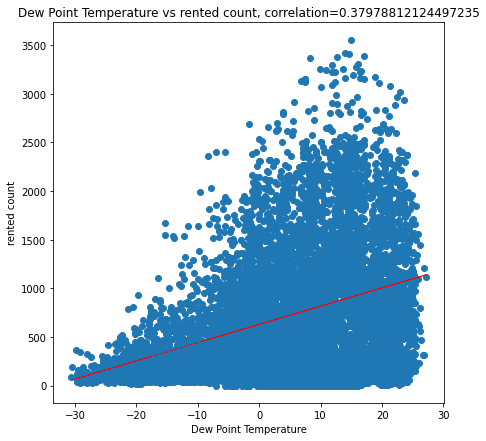

In [46]:
# Scatter plot between  dew point temperature and rented_count
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['dew_point_temp'].corr(df['rented_count'])
plt.scatter(x=df['dew_point_temp'],y=df['rented_count'])
z=np.polyfit(df['dew_point_temp'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['dew_point_temp'])
plt.plot(df['dew_point_temp'],y_hat,'r--',lw=1)
plt.xlabel('Dew Point Temperature')
plt.ylabel('rented count')
plt.title('Dew Point Temperature vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

The rented count shows increasing trend  with Dew Point Temperature but the correlation is not that strong. The higher Dew Point Temperature values have higher rented count but every Dew Point Temperature have some small rented count so, roughly, higher Dew Point Temperature value does not imply higher rented count.

#### Chart - 15 - Solar Radiation vs rented count scatter plot

Text(0.5, 1.0, 'Solar radiation vs rented count, correlation=0.261836985509591')

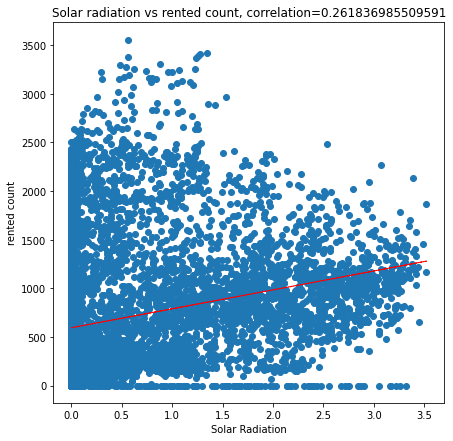

In [47]:
 # Scatter plot between solar radiation and rented_count
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['solar_radiation'].corr(df['rented_count'])
plt.scatter(x=df['solar_radiation'],y=df['rented_count'])
z=np.polyfit(df['solar_radiation'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['solar_radiation'])
plt.plot(df['solar_radiation'],y_hat,'r--',lw=1)
plt.xlabel('Solar Radiation')
plt.ylabel('rented count')
plt.title('Solar radiation vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

The scatter plot shows a weak positive correlation between rented_count and solar radiation.

#### Chart - 16 - Rainfall vs rented count scatter plot

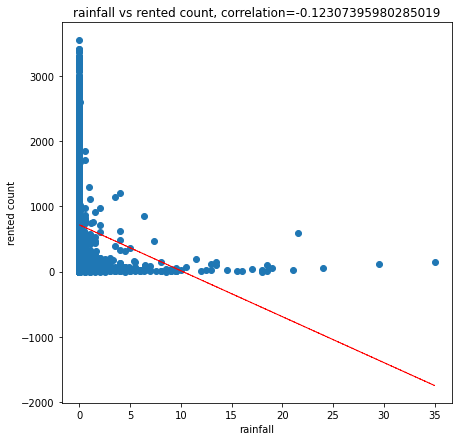

In [48]:
# Rainfall vs rented count scatter plot
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['rainfall'].corr(df['rented_count'])
plt.scatter(x=df['rainfall'],y=df['rented_count'])
z=np.polyfit(df['rainfall'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['rainfall'])
plt.plot(df['rainfall'],y_hat,'r--',lw=1)
plt.xlabel('rainfall')
plt.ylabel('rented count')
plt.title('rainfall vs rented count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

The correlation between rented_count and rainfall is negative which is obvious.

#### Chart - 17 - Snowfall vs rented count scatter plot

Text(0.5, 1.0, 'snowfall vs rented count, correlation=-0.1418036499974599')

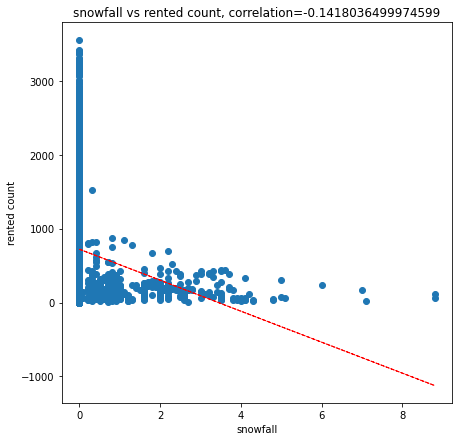

In [49]:
# Snowfall vs rented count scatter plot
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['snowfall'].corr(df['rented_count'])
plt.scatter(x=df['snowfall'],y=df['rented_count'])
z=np.polyfit(df['snowfall'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['snowfall'])
plt.plot(df['snowfall'],y_hat,'r--',lw=1)
plt.xlabel('snowfall')
plt.ylabel('rented count')
plt.title('snowfall vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

As expected, the correlation between rented_count and snowfall is negative but the correlation is very weak.

## ***5. Feature Engineering Data Pre-processing***

### Multicollinearity

In multiple regression model, multicollinearity means the existence of linear relationship among some or all independent variables. In case of perfect multicollinearity, the regression coefficients remain indeterminate and their standard errors are infinite.

In case of partial multicollinearity, the OLS estimates have large variances and covariances making precise estimation difficult. Due to large standard errors, the confidence intervals tend to be much wider leading to the acceptence of the 'zero null hypothesis' more readily i.e., the regression coefficient may not appear significant.

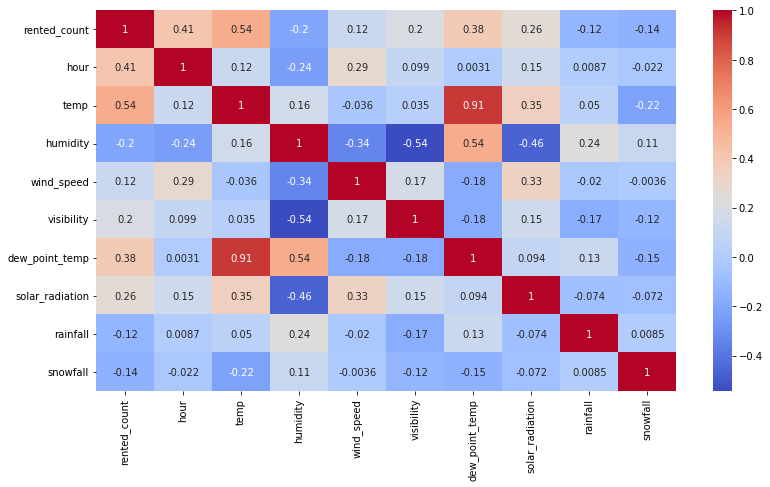

In [50]:
# plotting the heatmap to see the correlations
plt.figure(figsize=(13,7))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

The correlation heatmap suggests that the independent variables temp & dew_point_temp and visibility & humidity have considerable correlation.


Here, the correlation of dependent variable rented_count with  temperature is 0.54 and with hour it is 0.41.

**Variance Inflation Factor:**

VIF is a measure of amount of multicollinearity in regression model. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.



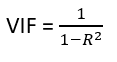

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

Large value of VIF indicates possible multicollinearity associated with the variable.


Generally, if VIF >= 10, multicollinearity is severe.

In [51]:
# writing a funtion to calculate VIF

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
# now create the vif dataframe holding the dependent variable rented_count.

calc_vif(df[[i for i in df.describe().columns if i not in['rented_count']]])

,variables,VIF
0,hour,4.418242
1,temp,33.385256
2,humidity,5.371996
3,wind_speed,4.805364
4,visibility,9.085977
5,dew_point_temp,17.126199
6,solar_radiation,2.881590
7,rainfall,1.081567
8,snowfall,1.120833


In [53]:
# removing the column dew_point_temp which has high vif value and low correlation with rented_count 
vif=calc_vif(df[[i for i in df.describe().columns if i not in['rented_count','dew_point_temp']]])
vif

,variables,VIF
0,hour,3.921832
1,temp,3.228318
2,humidity,4.868221
3,wind_speed,4.608625
4,visibility,4.710170
5,solar_radiation,2.246791
6,rainfall,1.079158
7,snowfall,1.120579


The VIF for temperature and dew point temperature were high so we removed the variable dew point temperature first as it had less correlation with the dependent variable rented_count.

Now all the vif values are less than 5 so the remaining 8 independent variables are not collinear.

In [54]:
# The selected numerical features are:
numerical_columns=list(vif['variables'].unique())
print(numerical_columns)

['hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']


### Encoding Categorical Data

In [55]:
# The catagorical columns are
categorical_columns = df.describe(include=['object','category']).columns.to_list()
categorical_columns

['seasons', 'holiday', 'funct_day', 'days', 'period']

All the categorical columns have nominal data and we are using label encoding for 'holiday' and 'funct_day' columns which have only 2 categories. And, as the categories have no ordering, one hot encoding is used to create numerical columns out of catagories in 'seasons', 'days' and 'period' columns.

In [56]:
# Getting dictionaries for Label Encoding
dict1={"No Holiday":1,"Holiday":0}
dict2={"Yes":1,"No":0}

In [57]:
# Label encoding
df['holiday']=df['holiday'].map(dict1)
df['funct_day']=df['funct_day'].map(dict2)

In [58]:
# One hot encoding
dataset= pd.get_dummies(df,columns=['seasons','days','period'],prefix=['_','_','period'])

In [59]:
dataset.shape

(8760, 26)

In [60]:
# Total features used in the model training 
features= numerical_columns.copy()
features.extend(['__Autumn','__Spring', '__Summer', '__Winter', 'holiday', 'funct_day', '__Friday', '__Monday','__Saturday',
                 '__Sunday', '__Thursday', '__Tuesday', '__Wednesday','period_day', 'period_evening', 'period_night'])

In [61]:
len(features)

24

###  Data Scaling

If ranges of features are not of the same order then we use data scaling. In case of normally dirtributed features, we use standardization and in non-normal data we use normalization.

Here, in our dataset distribution of temperature and humidity is close to normal distribution but all other feature are far from normality. so we are using normalization for scaling the data.

Also, the distribution of dependent variable rented_count is positively skewed so we are taking square root of the variable.

In [62]:
# Applying z-score to selected features
X=dataset[features].apply(zscore)
# Tranforming the dependant variable
y=np.sqrt(dataset['rented_count'])

In [63]:
#The scaled features are
X

,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,__Autumn,__Spring,...,__Friday,__Monday,__Saturday,__Sunday,__Thursday,__Tuesday,__Wednesday,period_day,period_evening,period_night
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,-0.707107,1.414214
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,-0.707107,1.414214
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,-0.707107,1.414214
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,-0.707107,1.414214
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,-0.707107,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.083473,-0.726961,-1.189822,0.844486,0.751605,-0.655132,-0.1318,-0.171891,1.735220,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,1.414214,-0.707107
8756,1.227936,-0.793939,-1.042483,0.554978,0.925871,-0.655132,-0.1318,-0.171891,1.735220,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,1.414214,-0.707107
8757,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-0.655132,-0.1318,-0.171891,1.735220,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,1.414214,-0.707107
8758,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-0.655132,-0.1318,-0.171891,1.735220,-0.580514,...,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.707107,1.414214,-0.707107


In [64]:
# Transformed dependent variable look like
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: rented_count, Length: 8760, dtype: float64

**Train test split** is a model validation technique. Models are fitted on the training set and validated using the testing set. This is mainly to know how our model performs on new data. We are using 80-20 split.

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 24)
(1752, 24)


## ***6. ML Model Implementation***

### ***1. Implementing Linear Regression***

In [66]:
# Fitting Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
# the training score is
regressor.score(X_train, y_train)

0.6832393504204626

In [67]:
# get the intercept term
regressor.intercept_

23.497777951913136

In [68]:
# Let's look at the coefficients
coef_1=regressor.coef_
coef_1

array([-2.20183614e+00,  5.32495761e+00, -2.90942567e+00, -1.36586781e-01,
        2.03087555e-01, -7.27624830e-01, -1.76481853e+00, -4.40053064e-02,
       -1.41969096e+13, -1.42486290e+13, -1.42486290e+13, -1.41444297e+13,
        6.01036379e-01,  5.14435429e+00, -8.24828662e+12, -8.18318468e+12,
       -8.18318468e+12, -8.18318468e+12, -8.18318468e+12, -8.18318468e+12,
       -8.18318468e+12,  8.25128208e+13,  8.25128208e+13,  8.25128208e+13])

In [69]:
# let's see the importance of the features
coef1=pd.Series(coef_1)
coef1.index=X.columns
coef1.sort_values()

__Spring          -1.424863e+13
__Summer          -1.424863e+13
__Autumn          -1.419691e+13
__Winter          -1.414443e+13
__Friday          -8.248287e+12
__Sunday          -8.183185e+12
__Monday          -8.183185e+12
__Saturday        -8.183185e+12
__Thursday        -8.183185e+12
__Tuesday         -8.183185e+12
__Wednesday       -8.183185e+12
humidity          -2.909426e+00
hour              -2.201836e+00
rainfall          -1.764819e+00
solar_radiation   -7.276248e-01
wind_speed        -1.365868e-01
snowfall          -4.400531e-02
visibility         2.030876e-01
holiday            6.010364e-01
funct_day          5.144354e+00
temp               5.324958e+00
period_night       8.251282e+13
period_day         8.251282e+13
period_evening     8.251282e+13
dtype: float64

In the Linear Regression Model the 3 periods of the day and 4 seasons come out to be the most important features and rainfall is the least one.

In [70]:
# now it's time to predict the dependent variable
y_pred=regressor.predict(X_test)
(y_pred)**2

array([ 317.8324523 ,  638.68368921,  338.88799553, ...,  296.34158647,
       1072.54488561,  548.75462778])

In [71]:
# Calculate MSE and RMSE
MSE=mean_squared_error((y_test)**2,(y_pred)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 152253.36263124095
RMSE= 390.1965692202341


In [72]:
# The r-square is
r2=r2_score((y_test)**2,(y_pred)**2)

# And the adjusted r2 is

adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.636212317252631
adjusted R2= 0.6311567848925055


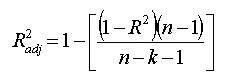

Here, training and test scores have considerable difference.

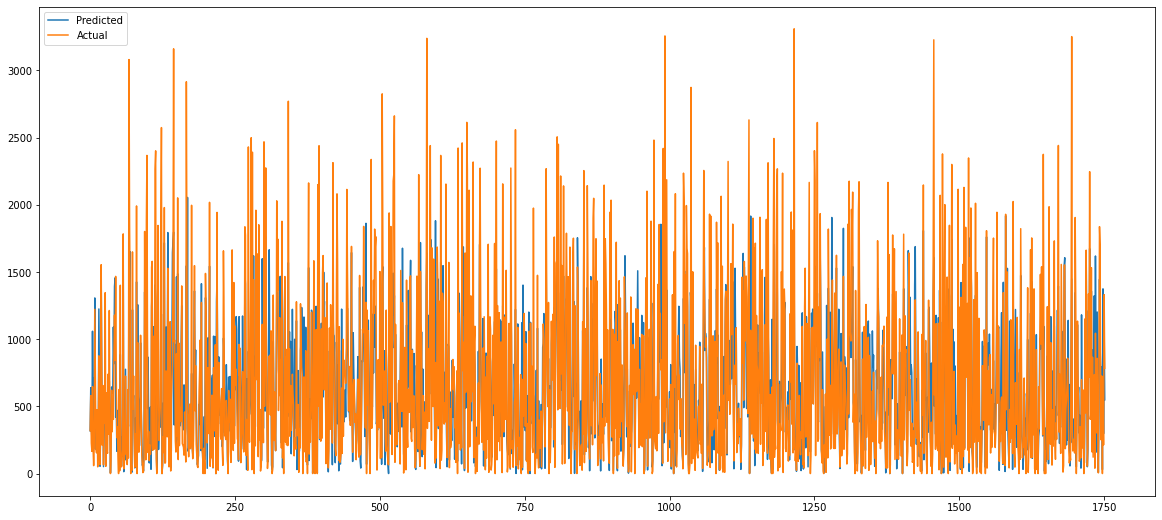

In [73]:
# Comparing the test and predicted set
plt.figure(figsize=(20,9))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

### ***2. Implementing Lasso Regression***

**Lasso regression** (or "L1 regularization") minimizes:

$$\text{RSS} + \lambda \sum_{j=1}^p \lvert \beta_j \rvert$$

 Where $\lambda$ is a **tuning parameter**

 <b>Lasso stands for least absolute shrinkage and selection operator</b>


Lasso regression shrinks the coefficients to zero and removes some of them from the model. Thus, it also serves as a feature selection tool.

In [131]:
# Fitting lasso regression
lasso=Lasso(alpha=0.1,max_iter=1000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [132]:
# the training score is
lasso.score(X_train, y_train)

0.6793357507547677

In [75]:
# The intercept term is
lasso.intercept_

23.513657673984348

In [76]:
# the coefficients are
coef_2=lasso.coef_
coef_2

array([-0.35715892,  5.16667554, -2.5783187 , -0.06171785,  0.28277039,
       -0.25732554, -1.68235067, -0.        ,  1.08642984, -0.        ,
        0.        , -2.27420059,  0.49678809,  5.00052813,  0.15620569,
       -0.09399183, -0.06406318, -0.66832002, -0.        ,  0.01894964,
        0.03193638,  0.        ,  2.38471729, -2.55721455])

In [77]:
# let's see the importance of the features
coef2=pd.Series(coef_2)
coef2.index=X.columns
coef2.sort_values()

humidity          -2.578319
period_night      -2.557215
__Winter          -2.274201
rainfall          -1.682351
__Sunday          -0.668320
hour              -0.357159
solar_radiation   -0.257326
__Monday          -0.093992
__Saturday        -0.064063
wind_speed        -0.061718
__Summer           0.000000
snowfall          -0.000000
__Thursday        -0.000000
period_day         0.000000
__Spring          -0.000000
__Tuesday          0.018950
__Wednesday        0.031936
__Friday           0.156206
visibility         0.282770
holiday            0.496788
__Autumn           1.086430
period_evening     2.384717
funct_day          5.000528
temp               5.166676
dtype: float64

In the Lasso(alpha=0.1) Regression model temperature and functioning_day are the most important features and  _Summer, snowfall, __Thursday, period_day and __Spring have the least importance.

In [78]:
# Prediction from the test set
y_pred_l=lasso.predict(X_test)
(y_pred_l)**2

array([ 334.95929668,  625.38912619,  337.65986523, ...,  277.51216746,
       1064.34271945,  491.48574825])

In [79]:
# the mse and rmse are
MSE=mean_squared_error((y_test)**2,(y_pred_l)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 159510.1265214611
RMSE= 399.38718872976017


In [80]:
# The r-square is
r2=r2_score((y_test)**2,(y_pred_l)**2)

# And the adjusted r2 is

adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.6188733155107655
adjusted R2= 0.6135768242381878


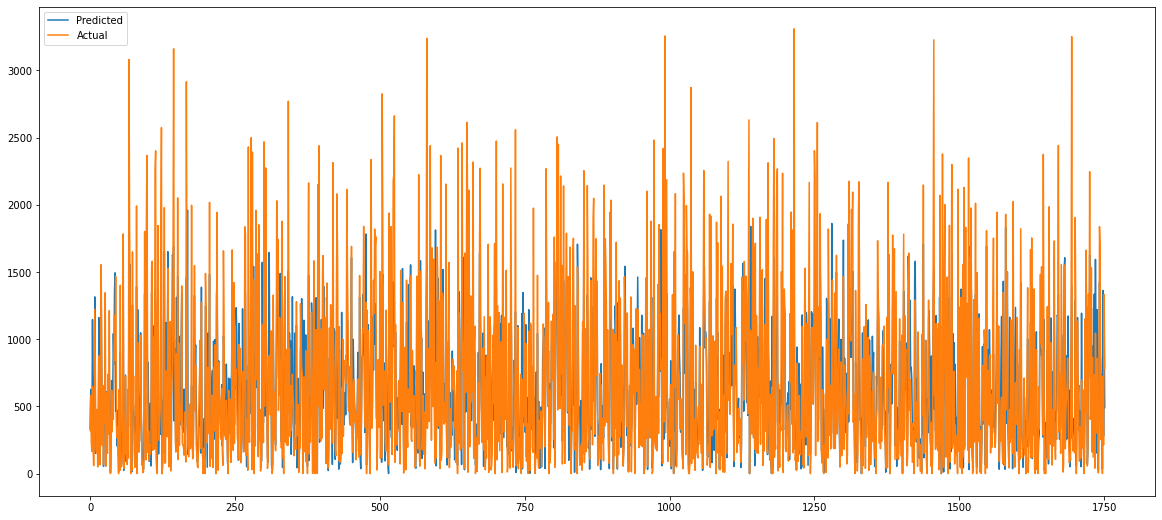

In [81]:
# comparing predictions with test set
plt.figure(figsize=(20,9))
plt.plot((y_pred_l)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

#### ***Cross Validation***

Cross-validation extends the train-test-split approach of model validation. In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. Cross-validation gives a more accurate measure of model quality. We do not need to cross validate for larger datasets, for the train-test-split is sufficient for larger data.

In [82]:
# Running Cross Validation & Hyperparameter Tuning
lasso=Lasso()
parameters={'alpha':[5e-3,6e-3,7e-3,8e-3,9e-3,1e-2,2e-2,3e-2,4e-2,5e-2,6e-2,1e-1,1]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=4)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.006, 0.007, 0.008, 0.009, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [83]:
# The tuned hyper-parameter is
print('the best fit alpha value is:',lasso_regressor.best_params_)
print("Using ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

the best fit alpha value is: {'alpha': 0.008}
Using  {'alpha': 0.008}  the negative mean squared error is:  -49.350280659334736


In [84]:
#looking at the parameters given by the best hyperparameter
l=Lasso(alpha=0.008,max_iter=1000)
l.fit(X_train,y_train)
l.intercept_

23.515153802442637

In [85]:
# The slopes are
coef_3=l.coef_
coef_3

array([-2.06322938e+00,  5.28696393e+00, -2.86038550e+00, -1.57727657e-01,
        2.32132491e-01, -6.21505479e-01, -1.76652402e+00, -2.99262252e-02,
        1.22201010e+00, -2.16214421e-03,  1.13441052e-01, -2.32496981e+00,
        5.88559122e-01,  5.14036519e+00,  2.22128941e-01, -1.87854331e-01,
       -1.47812561e-01, -7.65276793e-01, -0.00000000e+00,  1.04376374e-01,
        1.22231592e-01, -0.00000000e+00,  3.18566202e+00, -3.73337760e+00])

In [86]:
# let's see the feature importance
coef3=pd.Series(coef_3)
coef3.index=X.columns
coef3.sort_values()

period_night      -3.733378
humidity          -2.860385
__Winter          -2.324970
hour              -2.063229
rainfall          -1.766524
__Sunday          -0.765277
solar_radiation   -0.621505
__Monday          -0.187854
wind_speed        -0.157728
__Saturday        -0.147813
snowfall          -0.029926
__Spring          -0.002162
__Thursday        -0.000000
period_day        -0.000000
__Tuesday          0.104376
__Summer           0.113441
__Wednesday        0.122232
__Friday           0.222129
visibility         0.232132
holiday            0.588559
__Autumn           1.222010
period_evening     3.185662
funct_day          5.140365
temp               5.286964
dtype: float64

In the Lasso(alpha=0.008) Regression model temperature and functioning day come out to  be the most important features and thursday, period_day and spring have the least importance.

In [87]:
# prediction from the test set
y_pred_lasso=lasso_regressor.predict(X_test)
(y_pred_lasso)**2

array([ 320.09308485,  636.61260776,  336.99089217, ...,  298.67446312,
       1060.13785808,  543.06634105])

In [88]:
# Calculating MSE and RMSE
MSE=mean_squared_error((y_test)**2,(y_pred_lasso)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 153670.2760434625
RMSE= 392.00800507574144


In [89]:
# The r-square is
r2=r2_score((y_test)**2,(y_pred_lasso)**2)

# And the adjusted r2 is

adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.6328268048542338
adjusted R2= 0.6277242242615886


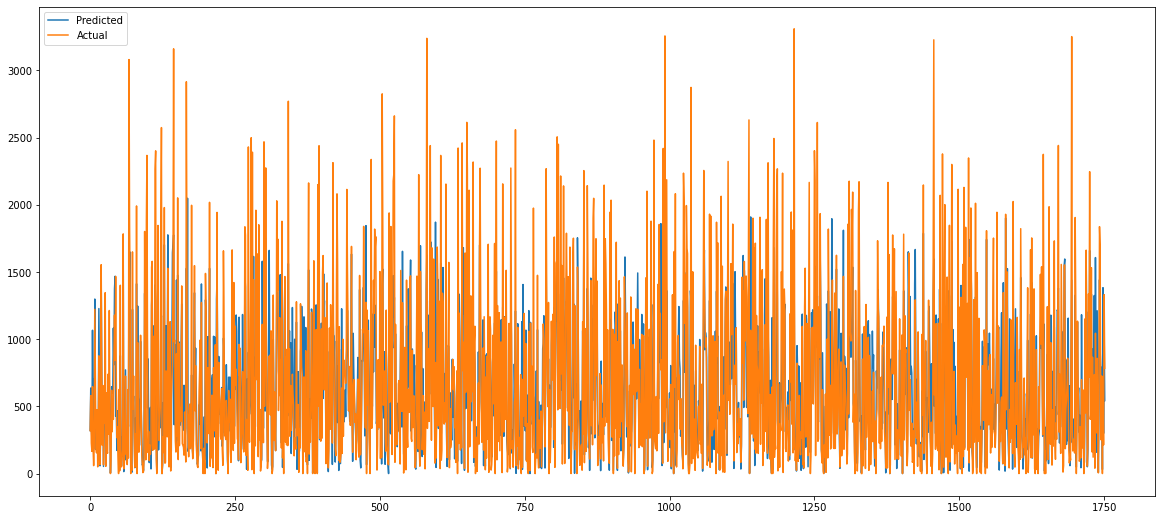

In [90]:
#Comparing prediction and test set
plt.figure(figsize=(20,9))
plt.plot((y_pred_lasso)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

### ***3. Implementing Ridge Regression***

 **Ridge regression** (or "L2 regularization") minimizes: 

$$\text{RSS} + \lambda \sum_{j=1}^p \beta_j^2$$


Ridge regression shrinks the coefficients toward zero, but they never reach zero. Here we, basically, introduce some bias in the model to shorten the variance. 

In [135]:
# Fitting the ridge regression
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [136]:
# the training score is
ridge.score(X_train, y_train)

0.6833100248758155

In [92]:
# The intercept is
ridge.intercept_

23.515284352720627

In [93]:
# the slpoes are
coef_4=ridge.coef_
coef_4

array([-2.20798046,  5.29650212, -2.88437757, -0.16589903,  0.22754831,
       -0.65252494, -1.77386314, -0.03511434,  1.47473459,  0.23903545,
        0.36548498, -2.08918009,  0.59658874,  5.1524703 ,  0.32165259,
       -0.10292412, -0.06200521, -0.68060088,  0.09308393,  0.20494918,
        0.22328558,  0.19322042,  3.44696858, -3.640189  ])

In [94]:
# let's see the importance of the features
coef4=pd.Series(coef_4)
coef4.index=X.columns
coef4.sort_values()

period_night      -3.640189
humidity          -2.884378
hour              -2.207980
__Winter          -2.089180
rainfall          -1.773863
__Sunday          -0.680601
solar_radiation   -0.652525
wind_speed        -0.165899
__Monday          -0.102924
__Saturday        -0.062005
snowfall          -0.035114
__Thursday         0.093084
period_day         0.193220
__Tuesday          0.204949
__Wednesday        0.223286
visibility         0.227548
__Spring           0.239035
__Friday           0.321653
__Summer           0.365485
holiday            0.596589
__Autumn           1.474735
period_evening     3.446969
funct_day          5.152470
temp               5.296502
dtype: float64

In the Ridge(alpha=0.1) Regression model temperature and funtioning_day stand the most important features and snowfall has the least importance.

In [95]:
# The predictions are
y_pred_r = ridge.predict(X_test)
(y_pred_r)**2

array([ 318.78401793,  637.53216781,  336.8776721 , ...,  300.48557649,
       1059.87162394,  547.59427788])

In [96]:
# The MSE and RMSE come out to be
MSE=mean_squared_error((y_test)**2,(y_pred_r)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 153273.59434656322
RMSE= 391.5017169139405


In [97]:
# The R2 scores are
r2 = r2_score((y_test)**2, (y_pred_r)**2)
print("R2 =" ,r2)
print("Adjusted R2 = ",1-(1-r2_score((y_test)**2, (y_pred_r)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 = 0.6337746191606592
Adjusted R2 =  0.6286852102781206


Here, in ridge regression the difference between training and test scores indicates that the learning is not that good.

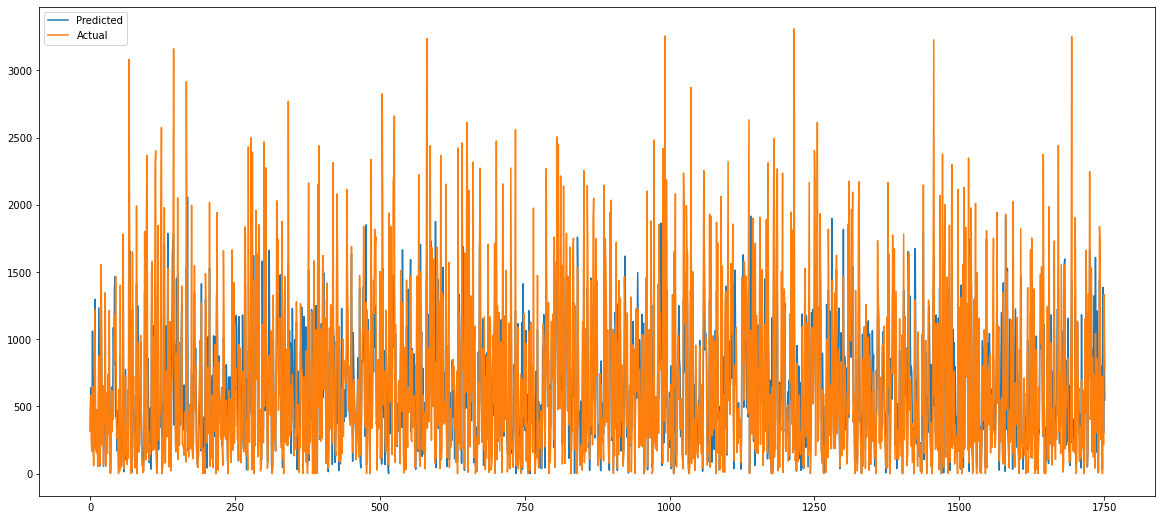

In [98]:
#plotting predicted and actual values
plt.figure(figsize=(20,9))
plt.plot((y_pred_r)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

#### ***Cross Validation***

In [99]:
# Running Cross Validation
ridge=Ridge()
parameters={'alpha':[1e-3,1e-2,2e-2,3e-2,4e-2,5e-2,6e-2,1e-1,1,2,3,4,5,6,7,8,9,10]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=4)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [100]:
# The tuned hyper parameter is
print('the best fit alpha value is:',ridge_regressor.best_params_)
print("Using ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

the best fit alpha value is: {'alpha': 8}
Using  {'alpha': 8}  the negative mean squared error is:  -49.35311326574886


In [101]:
#The intercept given by the model is
r= Ridge(alpha=8)
r.fit(X_train,y_train)
r.intercept_

23.515242800902822

In [102]:
# The slopes are
coef_5=r.coef_
coef_5

array([-2.14843474,  5.27246023, -2.87434305, -0.16551208,  0.23137804,
       -0.63951626, -1.77205255, -0.03717913,  1.47279287,  0.2387228 ,
        0.37474652, -2.09624599,  0.5954428 ,  5.14484883,  0.3211607 ,
       -0.10205112, -0.06177695, -0.67941929,  0.09244279,  0.20424195,
        0.22284689,  0.19022439,  3.41535599, -3.60558037])

In [103]:
# let's see the importance of the features
coef5=pd.Series(coef_5)
coef5.index=X.columns
coef5.sort_values()

period_night      -3.605580
humidity          -2.874343
hour              -2.148435
__Winter          -2.096246
rainfall          -1.772053
__Sunday          -0.679419
solar_radiation   -0.639516
wind_speed        -0.165512
__Monday          -0.102051
__Saturday        -0.061777
snowfall          -0.037179
__Thursday         0.092443
period_day         0.190224
__Tuesday          0.204242
__Wednesday        0.222847
visibility         0.231378
__Spring           0.238723
__Friday           0.321161
__Summer           0.374747
holiday            0.595443
__Autumn           1.472793
period_evening     3.415356
funct_day          5.144849
temp               5.272460
dtype: float64

In the Ridge(alpha=8) Regression model temperature and functioning_day come out to be the most important features and snowfall the least one.

In [104]:
# The predictions given by the model are
y_pred_ridge=ridge_regressor.predict(X_test)
(y_pred_ridge)**2

array([ 318.96716415,  636.16783095,  336.00644049, ...,  299.96103824,
       1060.86554214,  546.25783716])

In [105]:
# MSE and RMSE of the model are
MSE=mean_squared_error((y_test)**2,(y_pred_ridge)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 153425.3623855374
RMSE= 391.6954970197352


In [106]:
# Calclating the R2scores
r2=r2_score((y_test)**2,(y_pred_ridge)**2)
adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.6334119910895326
adjusted R2= 0.6283175427896767


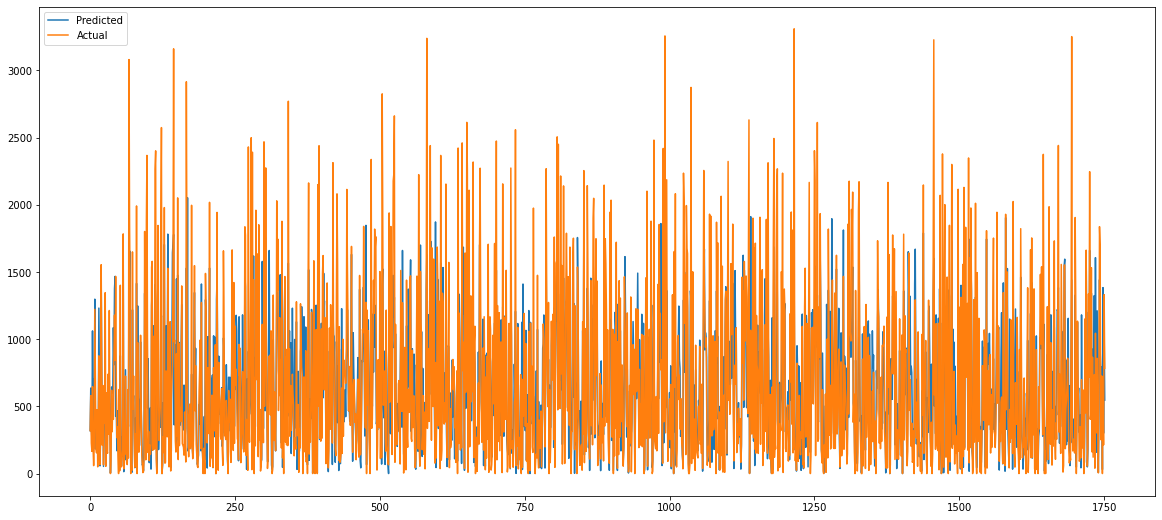

In [107]:
# Plotting the predicted and actual values
plt.figure(figsize=(20,9))
plt.plot((y_pred_ridge)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

### ***4. Implementing Elastic Net Regression***

Elastic Net is a combination of Ridge and Lasso penalties. It tackles overfitting and perform feature-selection simultaneously.

The cost function is:


$$\text{RSS} + b\sum_{j=1}^p \lvert \beta_j \rvert + a\sum_{j=1}^p \beta_j^2$$


alpha = a + b and

l1_ratio = a / (a + b)

In [108]:
# Fitting the ElasticNet model with arbitrary alpha and l1_ratio
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [109]:
# the training score is
elasticnet.score(X_train, y_train)

0.6769087751667242

In [110]:
# the intercept term comes out to be
elasticnet.intercept_

23.514230607092838

In [111]:
# The slope coefficients are
coef_5=elasticnet.coef_
coef_5

array([-0.11409706,  4.43719001, -2.36550731, -0.10701724,  0.38249671,
       -0.01966659, -1.65892725, -0.08479559,  1.12252369, -0.        ,
        0.39815178, -2.45364587,  0.51417443,  4.76811631,  0.21194892,
       -0.07846064, -0.06321467, -0.63937144,  0.        ,  0.07615535,
        0.10377474,  0.        ,  2.31272976, -2.41281666])

In [112]:
# let's see the importance of the features
coef5=pd.Series(coef_5)
coef5.index=X.columns
coef5.sort_values()

__Winter          -2.453646
period_night      -2.412817
humidity          -2.365507
rainfall          -1.658927
__Sunday          -0.639371
hour              -0.114097
wind_speed        -0.107017
snowfall          -0.084796
__Monday          -0.078461
__Saturday        -0.063215
solar_radiation   -0.019667
period_day         0.000000
__Spring          -0.000000
__Thursday         0.000000
__Tuesday          0.076155
__Wednesday        0.103775
__Friday           0.211949
visibility         0.382497
__Summer           0.398152
holiday            0.514174
__Autumn           1.122524
period_evening     2.312730
temp               4.437190
funct_day          4.768116
dtype: float64

In the ElasticNet(alpha=0.1, l1_ratio=0.5) Regression model functioning_day and temperature are the most important features and period_day, spring and thursday have no importance.

In [113]:
# The predictions are
y_pred_en = elasticnet.predict(X_test)
(y_pred_en)**2

array([ 332.45040467,  594.43218156,  323.96201782, ...,  283.4766309 ,
       1076.11127313,  492.29269912])

In [114]:
#The MSE and RMSE of the model are
MSE=mean_squared_error((y_test)**2,(y_pred_en)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 162597.81614236586
RMSE= 403.2341951550809


In [115]:
# The R2 score is
r2=r2_score((y_test)**2,(y_pred_en)**2)

In [116]:
# The adjusted R square is
adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [117]:
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.6114957217892227
adjusted R2= 0.6060967046050545


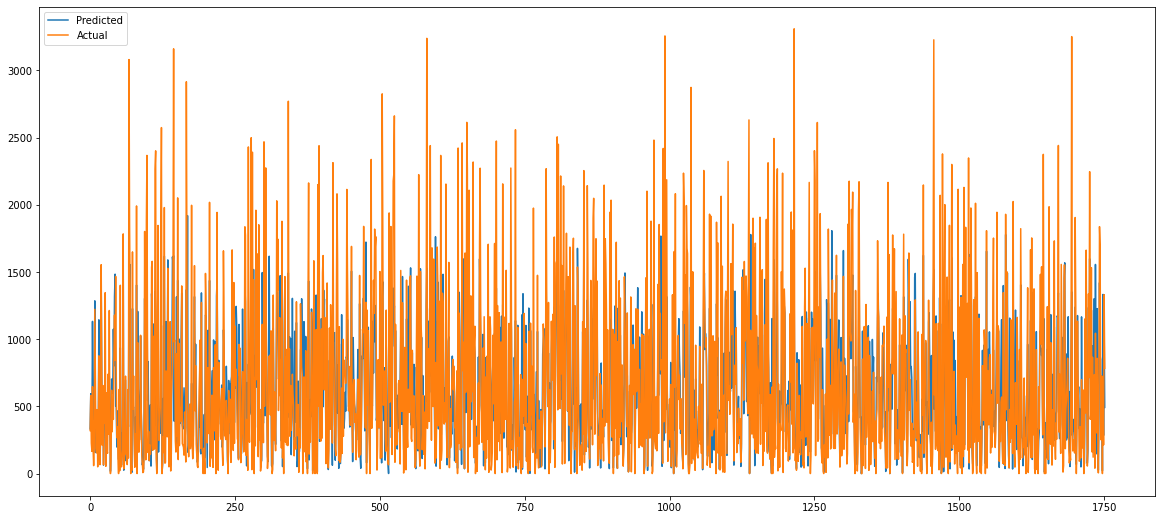

In [118]:
# Plotting the predicted and actual values
plt.figure(figsize=(20,9))
plt.plot((y_pred_en)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

#### ***Cross Validation***

In [119]:
# Cross-Validation & Hyperparameter Tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-4,6e-4,7e-4,8e-4,9e-4,1e-3,2e-3,3e-3,4e-3,1e-2,1e-1,1],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004, 0.01, 0.1, 1],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [128]:
# The tuned hyper-parameters are
print("The best fit hyper-parameter values are found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit hyper-parameter values are found out to be : {'alpha': 0.002, 'l1_ratio': 0.8}

Using  {'alpha': 0.002, 'l1_ratio': 0.8}  the negative mean squared error is:  -49.252280119355035


In [121]:
# The intercept of the model is
en=ElasticNet(alpha=0.002, l1_ratio=0.8)
en.fit(X_train,y_train)
en.intercept_

23.5152369928385

In [122]:
# And the slope coefficients are
coef_6=en.coef_
coef_6

array([-2.16035052,  5.28588554, -2.87583256, -0.16426487,  0.22969996,
       -0.64063492, -1.77173371, -0.03483546,  1.2339272 , -0.        ,
        0.12799732, -2.32771407,  0.59460893,  5.14743528,  0.2269456 ,
       -0.19363235, -0.15313181, -0.77114641,  0.        ,  0.11058207,
        0.12888973,  0.03352917,  3.26625393, -3.76679751])

In [123]:
# let's see the importance of the features
coef5=pd.Series(coef_5)
coef5.index=X.columns
coef5.sort_values()

__Winter          -2.453646
period_night      -2.412817
humidity          -2.365507
rainfall          -1.658927
__Sunday          -0.639371
hour              -0.114097
wind_speed        -0.107017
snowfall          -0.084796
__Monday          -0.078461
__Saturday        -0.063215
solar_radiation   -0.019667
period_day         0.000000
__Spring          -0.000000
__Thursday         0.000000
__Tuesday          0.076155
__Wednesday        0.103775
__Friday           0.211949
visibility         0.382497
__Summer           0.398152
holiday            0.514174
__Autumn           1.122524
period_evening     2.312730
temp               4.437190
funct_day          4.768116
dtype: float64

In the ElasticNet(alpha=0.002, l1_ratio=0.8) model functioning_day and temperature are the most important features and period_day, spring & thusrday are not relevant in the model.

In [124]:
# Predictions by the model are
y_pred_elastic = elastic_regressor.predict(X_test)
(y_pred_elastic)**2

array([ 319.09218695,  636.90076475,  336.6567777 , ...,  299.96473408,
       1060.27736925,  546.28145097])

In [125]:
# MSE and RMSE of the model
MSE=mean_squared_error((y_test)**2,(y_pred_elastic)**2)
RMSE=np.sqrt(MSE)
print('MSE=',MSE)
print('RMSE=',RMSE)

MSE= 153402.41010507382
RMSE= 391.6661972969761


In [126]:
# Calculating R2 for the model
r2=r2_score((y_test)**2,(y_pred_en)**2)
adjusted_r2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('R2=',r2)
print('adjusted R2=',adjusted_r2)

R2= 0.6114957217892227
adjusted R2= 0.6060967046050545


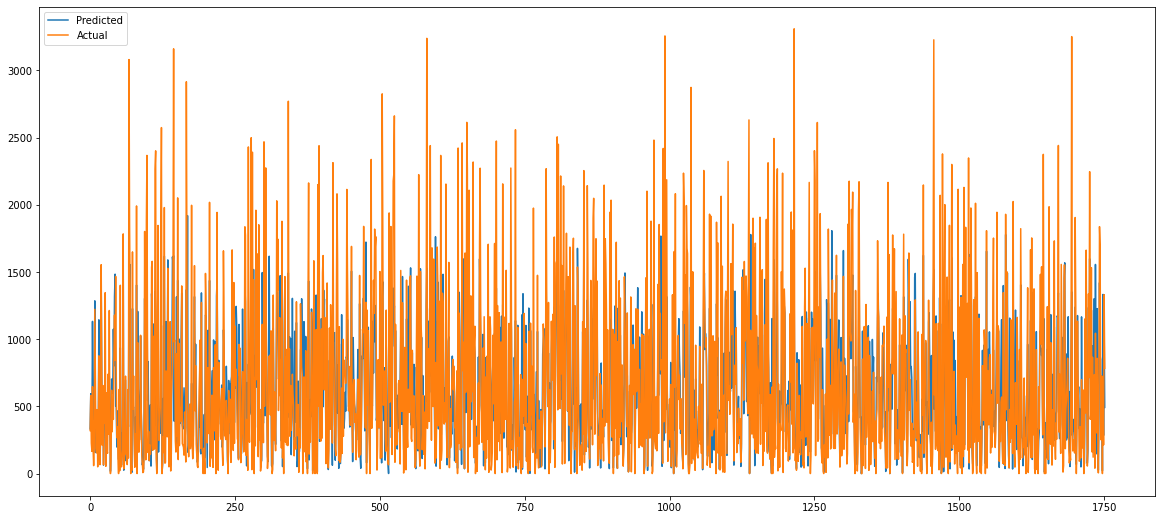

In [127]:
# Plotting the predicted and actual values
plt.figure(figsize=(20,9))
plt.plot((y_pred_en)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

# ***Conclusions***

* The Bike Sharing Demand dataset has hourly rented bike-count of 356 days with some hourly weather information. The dataset has 8760 rows & 14 columns with no duplicate and null values.
* We got a column for days from the 'date' column and also divided the 24 hours in 3 periods of 8 hours each to see the influence of different time-slots of the day.
*The dependent variable 'rented_count' had positively skewed distribution so we applied square root tranformation to get it normalized.
*Among the independent variables the temperature and humidity are almost normally distributed but other variables are skewed towards one side or the other so, while scaling the data, we considered applying normalization on them.
*The correlation coefficient between dependent variable rented_count and temperature is 0.54 which is the highest, next it is 0.41 between rented_count and hour.
* The collinearity between temperature and dew point temperature was high so we removed the variable dew point temperature as it had less correlation with the dependent variable rented_count.
*While encoding categorical data we used label encoding for 'holiday' and 'funct_day' columns which have only 2 categories. For the columns 'seasons', 'days' and 'period' one hot encoding is used to get the columns with numerical data.
*With 24 features in hand we split the data into train and test with 80% training and 20% test set.
*In the linear regression model with intercept ~23.498, the 3 periods of the day and 4 seasons come out to be the most important features and rainfall is the least important.

 RMSE of the model is 390.196569 which is of the order of the dependent variable.
 
 R2 is 0.636212317252631 and adjusted R2 is 0.6311567848925055 which are not very good values. This is because the correlations of dependent variable with features are not that strong.
 
* The Lasso Regressor with arbitrary tuning parameter 0.1 has intercept ~23.514. Temperature and functioning_day are the most important features in this model and _Summer, snowfall, __Thursday, period_day and __Spring features are removed.

 The RMSE is 399.3871887 which is worse than that of linear regression model.

 The R-square is 0.6188733 and adjusted R-square is 0.6135768 which proves the model is not very good.
* The Lasso Regressor with tuned hyper-parameter 0.008 has intercept ~23.515.
 Temperature and functioning day come out to be the most important features and thursday, period_day and spring have the least importance.

 The RMSE is 392.008005 which is not at par with the linear regression model.

 The R-square = 0.6328268048542338 and adjusted R2 = 0.6277242242615886 which proves this model also is not very good.

* The Ridge Regressor with arbitrary tuning parameter 0.1 has intercept ~23.51528. Temperature and funtioning_day stand the most important features and snowfall has the least importance.

 The RMSE is 391.5017169 which is better than the lasso regression model.

 The R-square is 0.6337746 and adjusted R-square is 0.628685 which means the   model is slightly better than the LASSO regressor.

* The Ridge regression with tuned hyper-parameter value 8 has intercept 23.515. Temperature and functioning_day come out to be the most important features and snowfall the least one. 

 The RMSE is 391.695497 and R-square & adjusted R-square, respectively, are 0.6335498 and 0.628457 that means Cross-Validation & Hyperparameter Tuning did not work well in this case.
* The ElasticNet regressor after Cross-Validation & Hyperparameter Tuning agrees with Hyperparameters 'alpha'= 0.002 & 'l1_ratio'= 0.8 and gives the intercept as ~23.515.

 Functioning_day and temperature are the most important features and period_day, spring & thusrday are not relevant in the model.
 
 RMSE= 391.666197, R2= 0.6114957 & adjusted R2= 0.6060967. This model has the smallest r-squares so it proves itself unworthy among all the models.
 
**Thus, for the given problem regularized regressions do not go well and the linear regression stands the best with RMSE = 390.196569 and R2 = 0.636212 & adjusted R2 = 0.63115678**

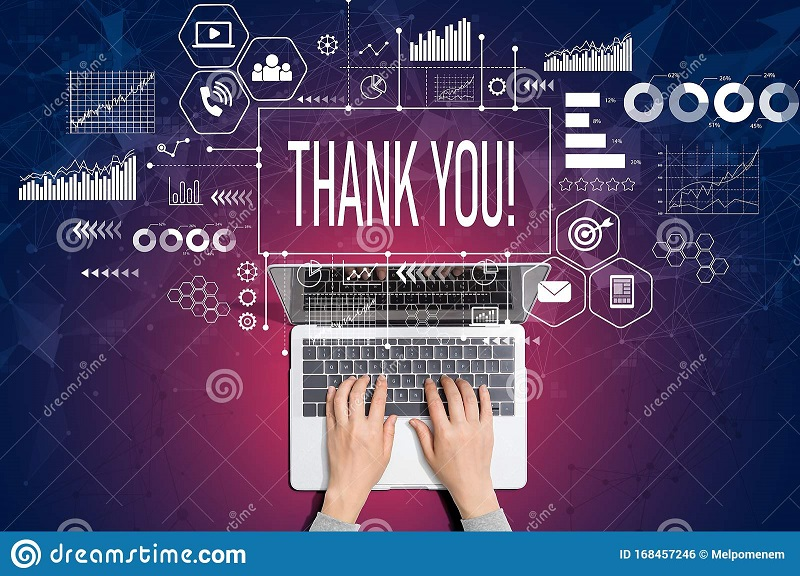